# Project 1: World Happiness Report 2017

Hello and welcome to my first project on Machine Learning. Here, I learned the basics of data analysis with Python. I discovered the different libraries (Numpy, Pandas, Seaborn, Matplotlib..) as well as how to handle probabilities and linear algebra with Python.

The data I use comes from the [2017 World Happiness Report](https://worldhappiness.report/ed/2017/). It's a survey measuring Happiness Scores across countries.

Let's start by importing the libraries needed:



In [1]:
# import the libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## A. Importing, cleaning and numerical summaries

After importing your data, one of the first thing to do in data analysis is checking if your dataset contains missing values.

In [3]:
# import data
happiness = pd.read_csv("data.csv")

#Check number of observations
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 12 columns):
Country             153 non-null object
Happiness Rank      153 non-null int64
Happiness Score     153 non-null float64
Economy             153 non-null float64
Family              153 non-null float64
Health              153 non-null float64
Freedom             153 non-null float64
Generosity          153 non-null float64
Corruption          153 non-null float64
Dystopia            153 non-null float64
Job Satisfaction    151 non-null float64
Region              153 non-null object
dtypes: float64(9), int64(1), object(2)
memory usage: 14.4+ KB


In [4]:
# Number of observations
happiness.shape[0]

153

In [5]:
# Column names
happiness.columns

Index(['Country', 'Happiness Rank', 'Happiness Score', 'Economy', 'Family',
       'Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia',
       'Job Satisfaction', 'Region'],
      dtype='object')

### Alternative

In [6]:
list(happiness.columns)

['Country',
 'Happiness Rank',
 'Happiness Score',
 'Economy',
 'Family',
 'Health',
 'Freedom',
 'Generosity',
 'Corruption',
 'Dystopia',
 'Job Satisfaction',
 'Region']

In [7]:
# Types of columns
happiness.dtypes

Country              object
Happiness Rank        int64
Happiness Score     float64
Economy             float64
Family              float64
Health              float64
Freedom             float64
Generosity          float64
Corruption          float64
Dystopia            float64
Job Satisfaction    float64
Region               object
dtype: object

In [8]:
# missing values
happiness.isnull().sum()

Country             0
Happiness Rank      0
Happiness Score     0
Economy             0
Family              0
Health              0
Freedom             0
Generosity          0
Corruption          0
Dystopia            0
Job Satisfaction    2
Region              0
dtype: int64

With these first commands, we can already answer some of the questions:

3. There are __153__ observations.
4. The column headings are indicated as (__Country, Happiness Rank, Happiness Score, Economy, Family, Health, Freedom, Generosity, Corruption, Dystopia, Job Satisfaction and Region__).
5. __Country__ __and__ __Regions__ are of type __object__ (strings), __Happiness Rank__ is of type __integer__, the rest is of type __float__.
6. There are __2__ missing values in the column __Job Satisfaction__.

As we only have 2 missing values, it's ok to just remove them. Keep in mind though that other alternatives are possible, such as imputing missing values by the mean of the variable, or other function we find best.

In [9]:
# remove missing values
happiness.dropna(inplace = True)
happiness.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 152
Data columns (total 12 columns):
Country             151 non-null object
Happiness Rank      151 non-null int64
Happiness Score     151 non-null float64
Economy             151 non-null float64
Family              151 non-null float64
Health              151 non-null float64
Freedom             151 non-null float64
Generosity          151 non-null float64
Corruption          151 non-null float64
Dystopia            151 non-null float64
Job Satisfaction    151 non-null float64
Region              151 non-null object
dtypes: float64(9), int64(1), object(2)
memory usage: 15.3+ KB


Now, let's look at the statistics of this dataset.

In [10]:
# Descriptive statistics about the data
happiness.describe()

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,77.827815,5.357874,0.983895,1.190509,0.550794,0.409805,0.244914,0.123008,1.854910,75.209934
std,44.934732,1.132826,0.420955,0.286371,0.236116,0.150144,0.135236,0.102776,0.502189,12.962365
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914,44.400000
25%,39.500000,4.505500,0.663371,1.042635,0.369866,0.303677,0.152574,0.056919,1.605148,68.950000
50%,78.000000,5.279000,1.064578,1.253918,0.606042,0.437454,0.230947,0.089283,1.832910,78.100000
75%,116.500000,6.101500,1.314879,1.418162,0.715975,0.519467,0.323762,0.152207,2.161605,85.100000
max,155.000000,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485,95.100000


### Alternative

In [11]:
happiness.describe().loc[['mean', 'min', 'max'],:]

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
mean,77.827815,5.357874,0.983895,1.190509,0.550794,0.409805,0.244914,0.123008,1.854910,75.209934
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914,44.400000
max,155.000000,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485,95.100000


In [12]:
happiness.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,151.0,77.827815,44.934732,1.000000,39.500000,78.000000,116.500000,155.000000
Happiness Score,151.0,5.357874,1.132826,2.693000,4.505500,5.279000,6.101500,7.537000
Economy,151.0,0.983895,0.420955,0.000000,0.663371,1.064578,1.314879,1.870766
Family,151.0,1.190509,0.286371,0.000000,1.042635,1.253918,1.418162,1.610574
Health,151.0,0.550794,0.236116,0.000000,0.369866,0.606042,0.715975,0.949492
Freedom,151.0,0.409805,0.150144,0.000000,0.303677,0.437454,0.519467,0.658249
Generosity,151.0,0.244914,0.135236,0.000000,0.152574,0.230947,0.323762,0.838075
Corruption,151.0,0.123008,0.102776,0.000000,0.056919,0.089283,0.152207,0.464308
Dystopia,151.0,1.854910,0.502189,0.377914,1.605148,1.832910,2.161605,3.117485
Job Satisfaction,151.0,75.209934,12.962365,44.400000,68.950000,78.100000,85.100000,95.100000


It seems that the values are normalized in a special way. For further infos, please check the [report](https://worldhappiness.report/ed/2017/).

We see that several variables determine the Happiness of the countries. But which countries are the happiest ones?

In [13]:
# List the 10 happiest countries
top_10 = happiness.sort_values('Happiness Score', ascending = False).head(10)
top_10

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
109,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,94.6,Western Europe
97,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,93.5,Western Europe
47,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,94.5,Western Europe
78,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,93.7,Western Europe
101,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,91.2,Western Europe
105,Netherlands,6,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,93.8,Western Europe
81,Canada,7,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,90.5,North America
5,New Zealand,8,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,88.6,Asia-Pacific
148,Australia,10,7.284,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211,89.2,Asia-Pacific
21,Sweden,9,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,92.7,Western Europe


Interesting, most of the happiest countries come from the Western Europe. Let's now look at the least happy countries of the world.

In [14]:
# List the 10 least happy countries
happiness.sort_values('Happiness Score').head(10)

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
79,Central African Republic,155,2.693,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005,70.4,Africa
40,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,54.3,Africa
45,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,57.8,Africa
39,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,62.7,Asia-Pacific
133,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,51.7,Africa
53,Togo,150,3.495,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229,44.8,Africa
107,Guinea,149,3.507,0.244550,0.791245,0.194129,0.348588,0.264815,0.110938,1.552312,55.1,Africa
139,Liberia,148,3.533,0.119042,0.872118,0.229918,0.332881,0.266550,0.038948,1.673286,56.6,Africa
138,Yemen,146,3.593,0.591683,0.935382,0.310081,0.249464,0.104125,0.056767,1.345601,58.9,Asia-Pacific
124,Haiti,145,3.603,0.368610,0.640450,0.277321,0.030370,0.489204,0.099872,1.697168,48.5,Latin America


Here however, we see that a lot of countries that are "not happy" come from Africa.
Let's try to group the countries by region and see if the mean happiness per region confirm what we just said.

## B. Indexing and grouping

In [15]:
# Create a csv file for each region
happiness_group = happiness['Region'].unique()

for region in happiness_group:
    group = happiness[happiness['Region'] == region]
    group.to_csv('{}.csv'.format(region))

### Alternative

In [16]:
groups = happiness.groupby(['Region'])
for region_name, group in groups:
    group.to_csv('{}.csv'.format(region_name))

In [17]:
# Mean happiness pro region
happiness_region = happiness.groupby('Region')
happiness_region.mean().sort_values('Happiness Score', ascending = False)

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
Region,,,,,,,,,,
North America,10.500000,7.154500,1.512732,1.450635,0.804422,0.558421,0.414059,0.211505,2.202689,87.900000
Western Europe,20.000000,6.880474,1.471893,1.485298,0.820159,0.546660,0.311760,0.231367,2.013270,90.310526
Latin America,50.772727,5.957818,1.006981,1.290156,0.611009,0.449222,0.210696,0.087764,2.301928,81.104545
Eastern Europe,70.619048,5.498952,1.178098,1.281235,0.681838,0.311535,0.170583,0.050637,1.825065,77.628571
Asia-Pacific,78.325581,5.358326,1.059272,1.167791,0.608605,0.429932,0.294002,0.148947,1.649736,77.834884
Africa,122.116279,4.254581,0.563714,0.970837,0.266773,0.356791,0.211645,0.100776,1.784001,61.193023
Europe,132.000000,4.096000,0.894652,1.394538,0.575904,0.122975,0.270061,0.023029,0.814382,72.300000


### Alternative

In [18]:
happiness.groupby('Region')['Happiness Score'].mean().sort_values( ascending = False).to_frame()

,Happiness Score
Region,
North America,7.154500
Western Europe,6.880474
Latin America,5.957818
Eastern Europe,5.498952
Asia-Pacific,5.358326
Africa,4.254581
Europe,4.096000


We see that on average, the happiest region is North America. The least happy country is... Europe? That's not what I expected. But when looking at the csv files created previously, we can see that Europe contains only one country ("Ukraine"). I think that for further Analysis it would be a good idea to place Ukraine in the Eastern Europe.

Let's change the Ukraine's region name:


In [19]:
happiness.loc[happiness['Country'] == "Ukraine", ['Region']] = "Eastern Europe"
happiness_region = happiness.groupby('Region')
happiness_region.mean().sort_values('Happiness Score', ascending = False)

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
Region,,,,,,,,,,
North America,10.500000,7.154500,1.512732,1.450635,0.804422,0.558421,0.414059,0.211505,2.202689,87.900000
Western Europe,20.000000,6.880474,1.471893,1.485298,0.820159,0.546660,0.311760,0.231367,2.013270,90.310526
Latin America,50.772727,5.957818,1.006981,1.290156,0.611009,0.449222,0.210696,0.087764,2.301928,81.104545
Eastern Europe,73.409091,5.435182,1.165214,1.286386,0.677022,0.302964,0.175104,0.049382,1.779125,77.386364
Asia-Pacific,78.325581,5.358326,1.059272,1.167791,0.608605,0.429932,0.294002,0.148947,1.649736,77.834884
Africa,122.116279,4.254581,0.563714,0.970837,0.266773,0.356791,0.211645,0.100776,1.784001,61.193023


Another way to measure it is to count the number of countries per region that have a high happiness score, let's say above 6.0

In [20]:
# number of countries per region with happiness score above 6.0
happiness_above_6 = happiness[happiness['Happiness Score'] > 6.0].copy()
happiness_above_6_table = happiness_above_6.groupby('Region').count()['Country']
happiness_above_6_table

Region
Asia-Pacific      11
Eastern Europe     1
Latin America     13
North America      2
Western Europe    17
Name: Country, dtype: int64

### Alternative

In [21]:
happiness_above_6.Region.value_counts()

Western Europe    17
Latin America     13
Asia-Pacific      11
North America      2
Eastern Europe     1
Name: Region, dtype: int64

Western Europe is still the winner. Note also that Africa is not mentioned. It means that no country in Africa has a happiness score above 6.

Now, I would like to know the gap within each region. Where is the biggest gap (highest score - lowest score)?

In [22]:
# compute the largest gap of happiness score pro region
happiness_range = happiness_region['Happiness Score'].max() - happiness_region['Happiness Score'].min()
happiness_range.sort_values(ascending = False)

Region
Asia-Pacific      3.852
Latin America     3.476
Africa            3.179
Western Europe    2.342
Eastern Europe    2.002
North America     0.323
Name: Happiness Score, dtype: float64

4. The region with the largest range of happiness scores is Asia-Pacific with 3.852.

## C. Bar plot of the Happiness Score

As we often says, one image is worth thousand words. Let's try to represent graphically the 10 happiest countries.

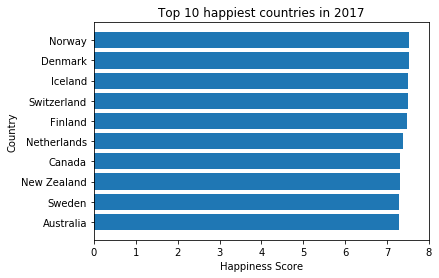

In [23]:
#1
top_10_plot = top_10.sort_values('Happiness Score')
plt.barh(top_10_plot['Country'], top_10_plot['Happiness Score'])
plt.xlim(0,8)
plt.title("Top 10 happiest countries in 2017")
plt.xlabel("Happiness Score")
plt.ylabel("Country");

We see that none of the best countries stands out. All the values lie between 7 and 8.
We could also seperate the happiness score by their categories, in order to better understand what happiness score is made of.

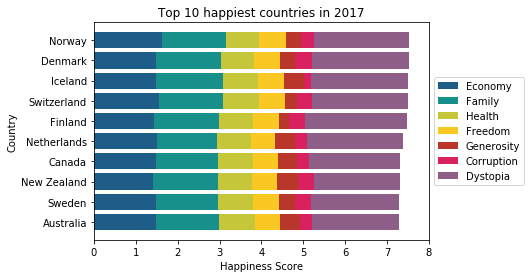

In [24]:
#2
Country = top_10_plot['Country']
Economy = top_10_plot['Economy']
Family = top_10_plot['Family']
Health = top_10_plot['Health']
Freedom = top_10_plot['Freedom']
Generosity = top_10_plot['Generosity']
Corruption = top_10_plot['Corruption']
Dystopia = top_10_plot['Dystopia']

plt.barh(Country, Economy, color = '#1D5D88', label = 'Economy')
plt.barh(Country, Family, color = '#178F8B', label = 'Family', left = Economy)
plt.barh(Country, Health, color = '#C5C63A', label = 'Health', left = Economy + Family)
plt.barh(Country, Freedom, color = '#F9C822', label = 'Freedom', left = Economy + Family + Health)
plt.barh(Country, Generosity, color = '#B9362B', label = 'Generosity', left = Economy + Family + Health + Freedom)
plt.barh(Country, Corruption, color = '#DA215F', label = 'Corruption', left = Economy + Family + Health + Freedom + Generosity)
plt.barh(Country, Dystopia, color = '#8E5E88', label = 'Dystopia', left = Economy + Family + Health + Freedom + Generosity + Corruption)
plt.xlim(0,8)
plt.title("Top 10 happiest countries in 2017")
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.legend(loc = 'center right', bbox_to_anchor=(1.3, 0.5));

### Alternative

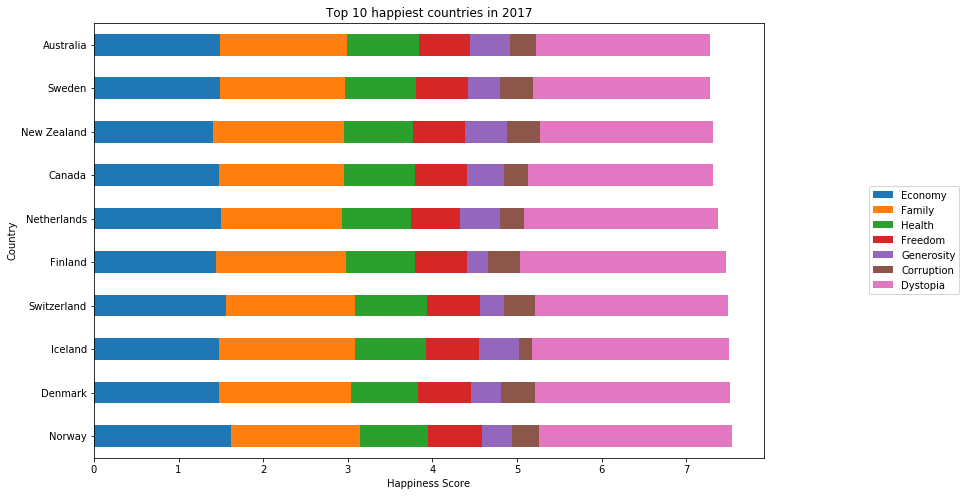

In [25]:
cols_plot=['Economy','Family','Health','Freedom','Generosity','Corruption','Dystopia']

(top_10_plot.set_index("Country")
             .loc[:,cols_plot]
             .plot.barh(stacked=True, figsize=(12,8))
             .invert_yaxis())

plt.title("Top 10 happiest countries in 2017")
plt.xlabel("Happiness Score")
plt.legend(loc = 'center right', bbox_to_anchor=(1.3, 0.5));

What about the continent of Africa?

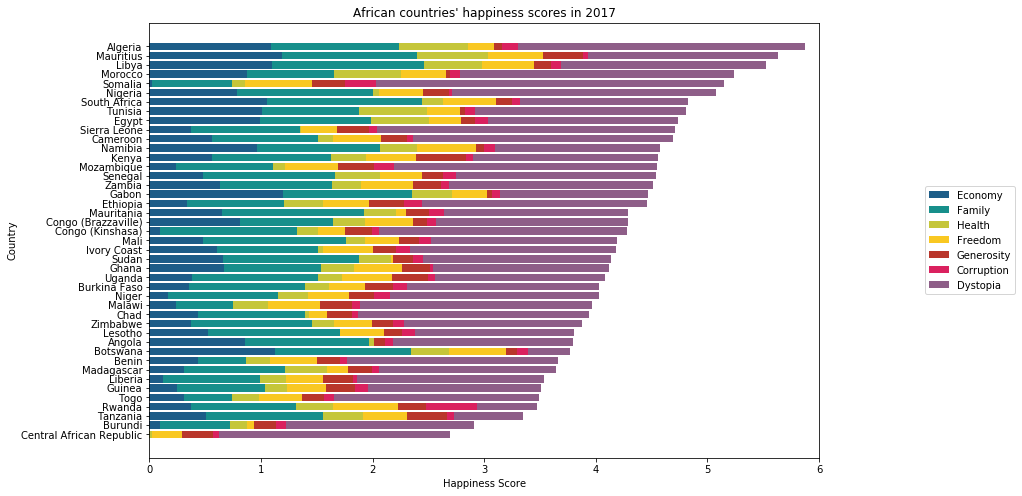

In [26]:
#3
# adapt the size of the graph
plt.rcParams['figure.figsize'] = [12, 8]

# Create categories 
africa = happiness[happiness['Region'] == 'Africa'].sort_values('Happiness Score')
Country = africa['Country']
Economy = africa['Economy']
Family = africa['Family']
Health = africa['Health']
Freedom = africa['Freedom']
Generosity = africa['Generosity']
Corruption = africa['Corruption']
Dystopia = africa['Dystopia']

# Create Plot
plt.barh(Country, Economy, color = '#1D5D88', label = 'Economy')
plt.barh(Country, Family, color = '#178F8B', label = 'Family', left = Economy)
plt.barh(Country, Health, color = '#C5C63A', label = 'Health', left = Economy + Family)
plt.barh(Country, Freedom, color = '#F9C822', label = 'Freedom', left = Economy + Family + Health)
plt.barh(Country, Generosity, color = '#B9362B', label = 'Generosity', left = Economy + Family + Health + Freedom)
plt.barh(Country, Corruption, color = '#DA215F', label = 'Corruption', left = Economy + Family + Health + Freedom + Generosity)
plt.barh(Country, Dystopia, color = '#8E5E88', label = 'Dystopia', left = Economy + Family + Health + Freedom + Generosity + Corruption)
plt.xlim(0,6)
plt.title("African countries' happiness scores in 2017")
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.legend(loc = 'center right', bbox_to_anchor=(1.3, 0.5));

It is interesting to note that only Central African Republic doesn't have the category Economy and Family that explains part of their Happiness Score. It would be interesting to know wether it is on purpose (those categories really don't have any value for this country) or if it is an error in the data. Unfortunately, this is not the topic of this project.


## D. Histogram of Job Satisfaction

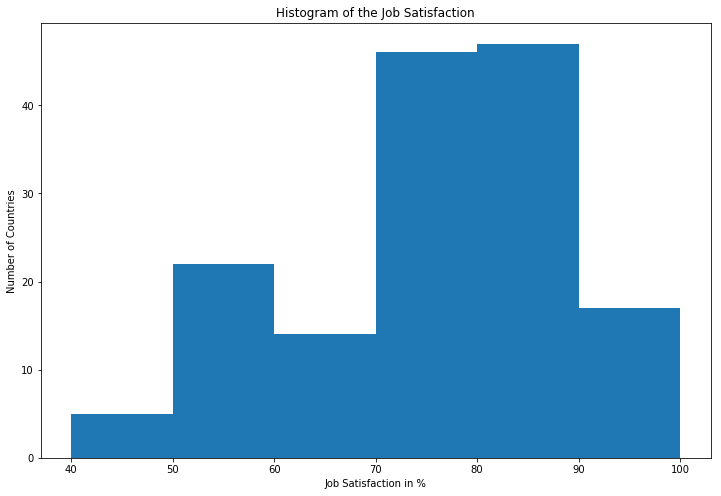

In [27]:
# Create Histogram
happiness['Job Satisfaction'].plot.hist(bins = [40,50,60,70,80,90,100])
plt.title('Histogram of the Job Satisfaction')
plt.ylabel('Number of Countries')
plt.xlabel('Job Satisfaction in %');

## E. Pairwise Scatter plots

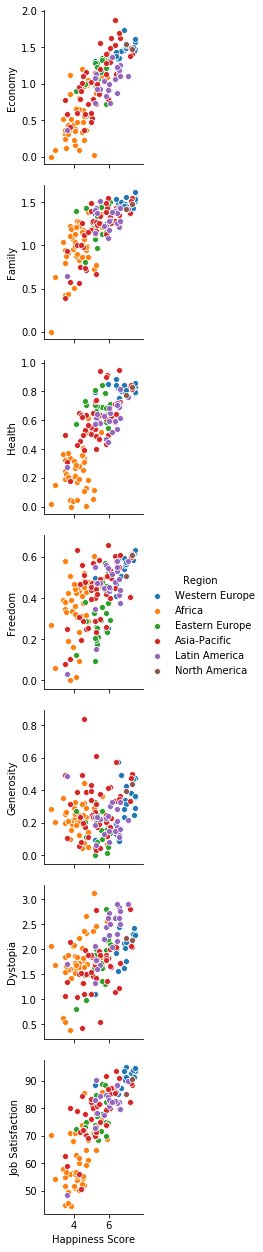

In [28]:
# Create pairwise scatter plots
sns.pairplot(happiness, 
             x_vars = ['Happiness Score'], 
             y_vars = ["Economy",
                         "Family",
                         "Health",
                         "Freedom",
                         "Generosity",
                         "Dystopia",
                         "Job Satisfaction"],
            hue="Region");

## F. Correlation

In [29]:
# Show correlation between variables
happiness.corr()["Happiness Score"]["Economy":]

Economy             0.808678
Family              0.749612
Health              0.777731
Freedom             0.567948
Generosity          0.164123
Corruption          0.438262
Dystopia            0.481117
Job Satisfaction    0.812873
Name: Happiness Score, dtype: float64

In [30]:
happiness.corr()["Happiness Score"]["Economy":].idxmax()

'Job Satisfaction'

The variable that has the highest correlation with the Happiness Score is the __Job Satisfaction__ variable with a correlation of __0.812873__.
I excluded the Happiness Rank because these two variables measure the same thing.

### Alternative

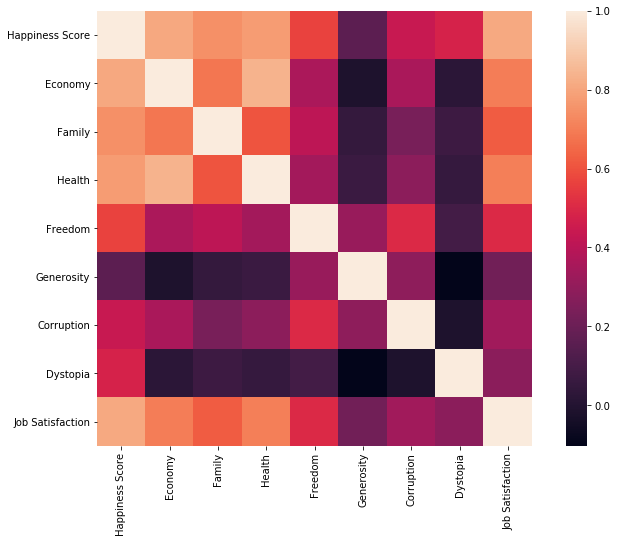

In [31]:
sns.heatmap(happiness.iloc[:, 2:].corr(), square=True);


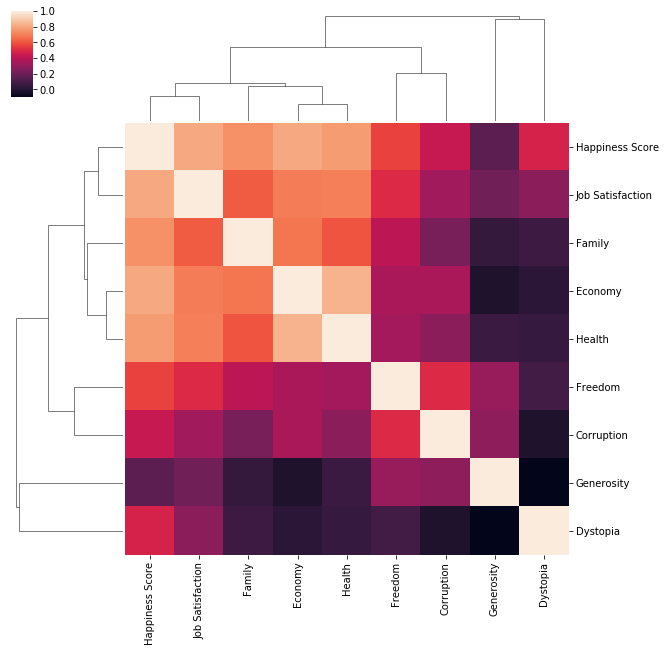

In [32]:
sns.clustermap(happiness.iloc[:, 2:].corr());


## G. Probabilities

In [34]:
# From point B.3 we can get the number of countries above 6.0 for each region
total_above_6 = happiness_above_6_table.sum()
western_europe_above_6 = happiness_above_6_table['Western Europe']

# compute probability
western_europe_above_6 / total_above_6

0.38636363636363635

### Alternative

In [35]:
happiness_above_6.Region.value_counts(normalize=True)*100

Western Europe    38.636364
Latin America     29.545455
Asia-Pacific      25.000000
North America      4.545455
Eastern Europe     2.272727
Name: Region, dtype: float64

The probability that randomly selected country with Happiness score over 6.0 is from Western Europe is __~38.6%__

## H. Matrices

In [36]:
# Retrieve column and row names
countries = np.array(happiness['Country'])
regions = happiness['Region'].unique()

# Create an empty matrix (with all zeroes)
matrix = np.zeros((151,6))

# Transform matrix into dataframes with row and column names
df = pd.DataFrame(matrix, columns = regions)
country_df = df.set_index(countries).copy()

# Fill the dataframe with "1" on corresponding country's region 
for country in countries:
    region = happiness[happiness['Country'] == country]['Region'] 
    country_df.loc[country, region] = 1

country_df

,Western Europe,Africa,Eastern Europe,Asia-Pacific,Latin America,North America
Malta,1.0,0.0,0.0,0.0,0.0,0.0
Zimbabwe,0.0,1.0,0.0,0.0,0.0,0.0
Cyprus,0.0,0.0,1.0,0.0,0.0,0.0
Iran,0.0,0.0,0.0,1.0,0.0,0.0
Mexico,0.0,0.0,0.0,0.0,1.0,0.0
New Zealand,0.0,0.0,0.0,1.0,0.0,0.0
Poland,0.0,0.0,1.0,0.0,0.0,0.0
Egypt,0.0,1.0,0.0,0.0,0.0,0.0
Senegal,0.0,1.0,0.0,0.0,0.0,0.0
Moldova,0.0,0.0,1.0,0.0,0.0,0.0


It is already the end of my project. I hope that you enjoyed reading it! 

### Alternative

In [37]:
# create a numpy array of regions of all the countries
A = happiness.Region.to_numpy()

# create a numpy array of all the regions
B = sorted(happiness.Region.unique())

print ('Order of Regions (Columns): ', B)

# check equality between A (reshaped as a column vector) and B to get a True | False matrix as a result of broadcasting.
# convert from bool to int to get the desired matrix.
(A.reshape(-1, 1) == B).astype(int)

Order of Regions (Columns):  ['Africa', 'Asia-Pacific', 'Eastern Europe', 'Latin America', 'North America', 'Western Europe']


array([[0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
 

In [38]:
pd.crosstab(happiness['Country'], happiness['Region']).head(20)

Region,Africa,Asia-Pacific,Eastern Europe,Latin America,North America,Western Europe
Country,,,,,,
Afghanistan,0,1,0,0,0,0
Albania,0,0,1,0,0,0
Algeria,1,0,0,0,0,0
Angola,1,0,0,0,0,0
Argentina,0,0,0,1,0,0
Armenia,0,1,0,0,0,0
Australia,0,1,0,0,0,0
Austria,0,0,0,0,0,1
Azerbaijan,0,1,0,0,0,0


In [39]:
pd.get_dummies(happiness.set_index("Country").Region)

,Africa,Asia-Pacific,Eastern Europe,Latin America,North America,Western Europe
Country,,,,,,
Malta,0,0,0,0,0,1
Zimbabwe,1,0,0,0,0,0
Cyprus,0,0,1,0,0,0
Iran,0,1,0,0,0,0
Mexico,0,0,0,1,0,0
New Zealand,0,1,0,0,0,0
Poland,0,0,1,0,0,0
Egypt,1,0,0,0,0,0
Senegal,1,0,0,0,0,0
